## Problem 1

The steady state equilibrium is characterized by the following values:
$$ b_2 = 0.0193127352392 $$
$$ b_3 = 0.058411590879 $$
$$ r = 2.43303025356 $$
$$ w = 0.201725293596 $$
$$ c_1 = 0.182412558356 $$
$$ c_2 = 0.209614907072 $$
$$ c_3 = 0.240873817365 $$

In [4]:
# Problem 1
# Solve for the steady-state in 3-per OG model

# Import libraries
import numpy as np
import scipy.optimize as opt

# Household paramters
yrs_live = 60
S=3
nvec = np.array([1.0,1.0,0.2]) #labor schedule for the households
L = nvec.sum() #total household labor
beta_annual = 0.96
beta = beta_annual**(yrs_live/S)
sigma = 3.0 #coefficient fo relative risk aversion in the utility function

# Firms' parameters
alpha = 0.35
A = 1.0
delta_annual = 0.05 #depreciation rate
delta = 1-(1-delta_annual)**(yrs_live/ S)

#stuff will take as an input guesses for b2 and b3, and arguments beta and sigma

def get_r(K, L, *params):
    A, alpha, delta = params
    r = alpha*A*((L/K)**(1-alpha)) - delta
    return r

def get_w(K, L, *params):
    A, alpha, delta = params
    w = (1-alpha)*A*((K/L)**(alpha))
    return w

def find_errors(b2b3vals, *args):
    beta, sigma, nvec, alpha, A, delta = args
    r = get_r(b2b3vals.sum(), L, A, alpha, delta)
    w = get_w(b2b3vals.sum(), L, A, alpha, delta)
    MUc1 = (w - b2b3vals[0])**(-sigma)
    MUc2 = ((1+r)*(b2b3vals[0]) + w - b2b3vals[1])**(-sigma)
    MUc3 = ((1+r)*(b2b3vals[1]) + 0.2*w)**(-sigma)
    error1 = MUc1 - beta*(1+r)*MUc2
    error2 = MUc2 - beta*(1+r)*MUc3
    errors = np.array([error1, error2])
    return errors

#Make initial guess for b2 and b3, and then solve
b2_0 = 0.1
b3_0 = 0.1
b_0 = np.array([b2_0, b3_0])
b_args = (beta, sigma, nvec, alpha, A, delta)
b_result = opt.root(find_errors, b_0, args=(b_args)) 
b2_ss = b_result.x[0]
b3_ss = b_result.x[1]
w_ss = get_w(b2_ss + b3_ss, L, A, alpha, delta)
r_ss = get_r(b2_ss + b3_ss, L, A, alpha, delta)
c1_ss = w_ss - b2_ss
c2_ss = (1+r_ss)*b2_ss + w_ss - b3_ss
c3_ss = (1+r_ss)*b3_ss + 0.2*w_ss
print("b2 value: " + str(b2_ss))
print("b3 value: " + str(b3_ss))
print("r value: " + str(r_ss))
print("w value: " + str(w_ss))
print("c1 value: " + str(c1_ss))
print("c2 value: " + str(c2_ss))
print("c3 value: " + str(c3_ss))

b2 value: 0.0193127352392
b3 value: 0.058411590879
r value: 2.43303025356
w value: 0.201725293596
c1 value: 0.182412558356
c2 value: 0.209614907072
c3 value: 0.240873817365


## Problem 2

When $\beta$ increases, we obtain the following new steady state values:

$$b_2 = 0.028176959268$$
$$b_3 = 0.0768655662396$$
$$r = 1.88635999915$$
$$w = 0.22415231191$$
$$c_1 = 0.195975352642$$
$$c_2 = 0.228615593799$$
$$c_3 = 0.266692158088$$

We note that compared to Problem 1, all of the values increase except for r. The intuition is that as households get more patient, they will save more money because they place more value on future savings. As a result, the total amount of capital K increases so wages increase while the interest rate r decreases. Due to the increase in wages and total capital, consumption in each period also increases.


In [5]:
# Problem 2

beta = 0.55
b2_0 = 0.1
b3_0 = 0.1
b_0 = np.array([b2_0, b3_0])
b_args = (beta, sigma, nvec, alpha, A, delta)
b_result = opt.root(find_errors, b_0, args=(b_args)) 
b2_ss = b_result.x[0]
b3_ss = b_result.x[1]
w_ss = get_w(b2_ss + b3_ss, L, A, alpha, delta)
r_ss = get_r(b2_ss + b3_ss, L, A, alpha, delta)
c1_ss = w_ss - b2_ss
c2_ss = (1+r_ss)*b2_ss + w_ss - b3_ss
c3_ss = (1+r_ss)*b3_ss + 0.2*w_ss
print("b2 value: " + str(b2_ss))
print("b3 value: " + str(b3_ss))
print("r value: " + str(r_ss))
print("w value: " + str(w_ss))
print("c1 value: " + str(c1_ss))
print("c2 value: " + str(c2_ss))
print("c3 value: " + str(c3_ss))

b2 value: 0.028176959268
b3 value: 0.0768655662396
r value: 1.88635999915
w value: 0.22415231191
c1 value: 0.195975352642
c2 value: 0.228615593799
c3 value: 0.266692158088


## Problem 3

The transition path to the steady state equilibrium is shown in the output below. The output for both calculated paths of K are printed to illustrate that the solution did indeed converge.

In [6]:
# Solves for the time path in the three period model, given a previous steady state output

# Import libraries
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt
%matplotlib inline

# Household paramters
yrs_live = 60
S=3
nvec = np.array([1.0,1.0,0.2]) #labor schedule for the households
L = nvec.sum() #total household labor
beta_annual = 0.96
beta = beta_annual**(yrs_live/S)
sigma = 3.0 #coefficient fo relative risk aversion in the utility function

# Firm parameters
alpha = 0.35
A = 1.0
delta_annual = 0.05 #depreciation rate
delta = 1-(1-delta_annual)**(yrs_live/ S)

# TPI paramters
TPI_tol = 1e-9
maxiter_TPI = 300
T = 40
xi = 0.8 #timepath updating parameter

# Parameters from the steady state
b2_ss = 0.01931274
b3_ss = 0.05841159
r_ss = 2.43303025356
w_ss = 0.201725293596

# Initialize the saving values in period 1
b2_1 = 0.8*b2_ss
b3_1 = 1.1*b3_ss

# Guess a new time path through time T
Kpath_init = np.linspace(b2_1 + b3_1, b2_ss + b3_ss, T)

# Define the distance function between two paths
def distance(Kpath_init, Kpath_new):
    return sum((100*((Kpath_init - Kpath_new)/Kpath_new))**2)

# Functions to get r and w given labor, capital, and parameters
def get_r(K, L, *params):
    A, alpha, delta = params
    r = alpha*A*((L/(K))**(1-alpha)) - delta
    return r

def get_w(K, L, *params):
    A, alpha, delta = params
    w = (1-alpha)*A*(((K)/L)**(alpha))
    return w

# Function of Euler errors to reduce, takes in a complete vector of r and w and paramters
def euler_errors(b2b3vals, *args):
    b2, b3 = b2b3vals
    r[i], r[i+1], w[i-1], w[i], w[i+1], sigma, beta, nvec = args
    MUc1 = (w[i-1] - b2)**(-sigma)
    MUc2 = ((1+r[i])*(b2) + w[i] - b3)**(-sigma)
    MUc3 = ((1+r[i+1])*(b3) + 0.2*w[i+1])**(-sigma)
    error1 = MUc1 - beta*(1+r[i])*MUc2
    error2 = MUc2 - beta*(1+r[i+1])*MUc3
    return np.array([error1, error2])

## Solve for the first new path given the rates from initial guess
# Initialize the r and w vectors for the time path guess
r = np.append(get_r(Kpath_init, L, A, alpha, delta), [r_ss]*4)
w = np.append(get_w(Kpath_init, L, A, alpha, delta), [w_ss]*4)

# Initialize the b2 and b3 vectors
b2 = np.zeros_like(Kpath_init)
b3 = np.zeros_like(Kpath_init)
b2[0] = b2_1
b3[0] = b3_1
b3[1] = (1/(1+(beta*(1+r[1]))**(1/-sigma)*(1+r[1])))*((1+r[0])*b2_1 + w[0] - (beta*(1+r[1]))**(1/-sigma)*0.2*w[1])

# Fill in the rest of the b2 and b3 (and K) vector
i = 1
while i <= T-1:
    sol = opt.root(euler_errors, np.array([0.1,0.1]), args = (r[i], r[i+1], w[i-1], w[i], w[i+1], sigma, beta, nvec))
    if i <= T-2:
        b2[i], b3[i+1] = sol['x']
    else:
        b2[i] = sol.x[0]
    i = i+1
Kpath_new = (b2+b3)

# Function to fill in the b2 and b3 values for all future paths
def get_K(b2_1, b3_1, *args):
    r, w, sigma, beta, nvec = args
    b2 = np.zeros_like(Kpath_init)
    b3 = np.zeros_like(Kpath_init)
    b2[0] = b2_1
    b3[0] = b3_1
    b3[1] = (1/(1+(beta*(1+r[1]))**(1/-sigma)*(1+r[1])))*((1+r[0])*b2_1 + w[0] - (beta*(1+r[1]))**(1/-sigma)*0.2*w[1])
    i = 1
    while i <= T-1:
        sol = opt.root(euler_errors, np.array([0.1,0.1]), args = (r[i], r[i+1], w[i-1], w[i], w[i+1], sigma, beta, nvec))
        if i <= T-2:
            b2[i], b3[i+1] = sol['x']
        else:
            b2[i] = sol.x[0]
        i = i+1
    K_sum = (b2+b3)
    return K_sum
    
# Iterate through until convergence
iter_TPI = 0
dist_TPI = 1
while (iter_TPI < maxiter_TPI) and (dist_TPI > TPI_tol):
    iter_TPI += 1
    Kpath_init = xi*Kpath_new+(1-xi)*Kpath_init
    r = np.append(get_r(Kpath_init, L, A, alpha, delta), [r_ss]*3)
    w = np.append(get_w(Kpath_init, L, A, alpha, delta), [w_ss]*3)
    b_args = (r, w, sigma, beta, nvec)
    Kpath_new = get_K(b2_1, b3_1, r, w, sigma, beta, nvec)
    dist_TPI = distance(Kpath_init, Kpath_new)

# Print output
print(Kpath_init)
print(Kpath_new)

[ 0.07970294  0.07537332  0.07773082  0.07716542  0.07761587  0.07757059
  0.0776684   0.07767696  0.07770178  0.07770869  0.07771592  0.07771898
  0.07772129  0.07772246  0.07772324  0.07772367  0.07772394  0.0777241
  0.07772419  0.07772425  0.07772428  0.0777243   0.07772432  0.07772432
  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433
  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433
  0.07772433  0.07772433  0.07772433  0.07772433]
[ 0.07970294  0.07537332  0.07773082  0.07716542  0.07761587  0.07757059
  0.0776684   0.07767696  0.07770178  0.07770869  0.07771592  0.07771898
  0.07772129  0.07772246  0.07772324  0.07772367  0.07772394  0.0777241
  0.07772419  0.07772425  0.07772428  0.0777243   0.07772431  0.07772432
  0.07772432  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433
  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433
  0.07772433  0.07772433  0.07772433  0.07772433]


## Problem 4

The equilibrium time path of K is plotted below. Based on the output from Problem 3, it takes just 6 periods for the total capital stock to remain within 0.0001 of the steady state so $T = 6.$


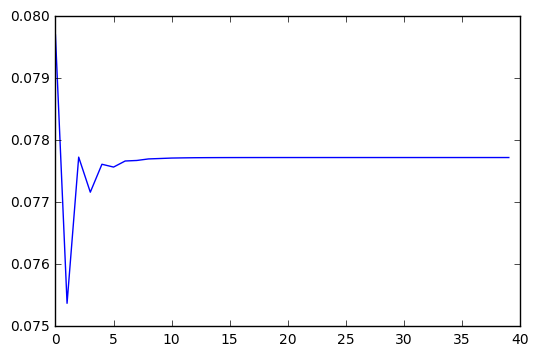

In [7]:
plt.plot(Kpath_init)
plt.show()